In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import cv2
warnings.filterwarnings("ignore")
import random


Mounted at /content/gdrive


# 2주차 Recap

$$  Linearity \ is ..$$
𝐴𝑑𝑑𝑖𝑡𝑖𝑣𝑖𝑡𝑦:
𝑓(𝑥+𝑦)=𝑓(𝑥)+𝑓(𝑦)

𝐻𝑜𝑚𝑜𝑔𝑒𝑛𝑒𝑖𝑡𝑦:
𝛼𝑓(𝑥)=𝑓(𝛼𝑥)



왜 통계적 머신러닝은 선형성을 좋아하는가?



> 데이터에 대한 직관적인 해석을 할 수 있다. 



> 연산의 효율성이 높다.



> 추론이 용이하다.



> 통계 모델들의 기본 가정이기에 지켜야 한다.











왜 현대의 딥러닝은 비선형성을 좋아하는가?




> 복잡한 데이터에 대한 해석을 가능케 한다.

> 모델을 데이터에 유연하게 적응 시킬 수 있다.

> 인간의 사고과정과 유사하다.









Optimizing Model = Minimizing Loss function = Differentiating loss function until its global minimum

Parameters vs HyperParameters

Data split (train data, validation data, test data)

Overfitting(과적합)이란 무엇인가?

Linear Regression

Decision Trees

#분류

## 분류 pt.1 (Overview)

Classification의 아이디어를 바탕으로 할 수 있는 일들에는 다음과 같은 것들이 있다.


>단순 분류

사기 검출, 이상치 탐지, 암 진단, 정상/비정상 구분 등



> 분류 + NLP

스팸 이메일 분류, 감정 분석, 어법 진단 등


> 분류 + CV

지문 인식, 얼굴 인식, 동작 예측, 동작 구분, 화풍 판단, 필기 인식, 의학 데이터 증강 등

> 분류 + Audio


음성 인식, 장르 구분 등



> 분류 + Recommendation System

음악 추천, 넷플릭스 자동 추천, 유튜브 알고리즘(?)










##분류 pt.2 (Evaluation)



*   정확도(Accuracy)

*   오차행렬(Confusion Matrix)

*   정밀도(Precision)와 재현율(Recall)


*   F1 스코어





###**정확도** : 실제 데이터와 예측 데이터가 얼마나 같은지 판단

$$ 정확도 = \frac{옳은\ 예측 \ 결과\ 건수}{전체\ 예측\ 데이터\ 건수}$$

결과가 직관적이나 너무 딱딱해서 실제로 잘 쓰이지 않음. 모델이 거의 다 맞춘 것을 실수로 틀렸을 수도 있고 틀린 것을 운 좋게 맞았을 수도 있는데 이를 너무 무 자르듯 생각하면 왜곡이 발생할 수 있음.

###**오차 행렬(Confusion Matrix)** : 학습된 분류 모형이 얼마나 헷갈리고 있는지 보여주는 지표

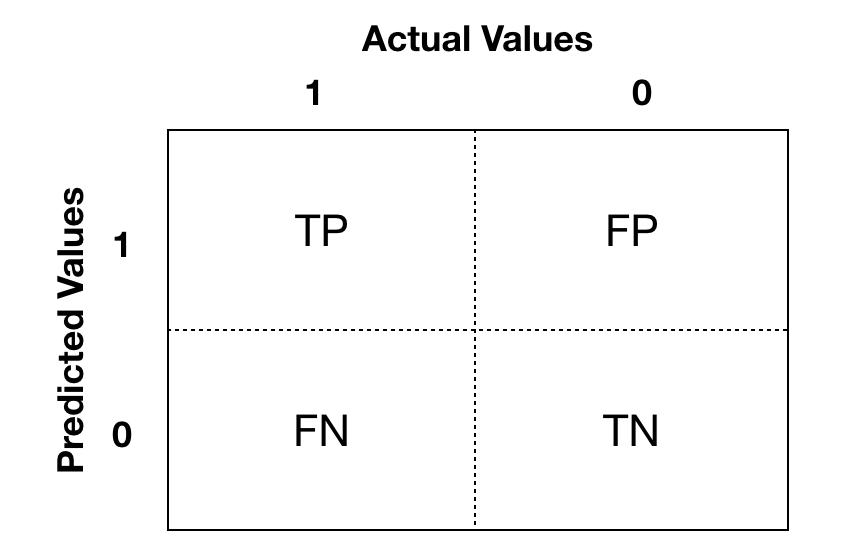

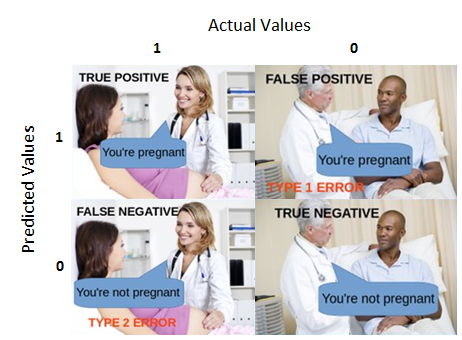

Type 1 Error(1종 오류) : False Positive


1.   아닌 것을 맞다고 판단하는 것. 
2.   통계학에서 제일 지양하는 오류. 통계학은 현상을 귀무적으로 생각하는 경향이 있기 때문.
 



---
Type 2 Error(2종 오류) : False Negative
1. 맞는 것을 아니라고 판단하는 것.


Type 1 error 와 Type 2 error는 서로 trade-off 관계에 놓여 있다. 즉 한쪽이 커지면 한쪽이 작아지는 상쇄 관계인 것. Positive(맞다고 판단)하는 경향이 있는 모델일수록 Type 1 Error가 높아지고 Type 2 Error이 낮아지나 Negative(틀리다고 판단)하는 경향이 있는 모델일수록 반대 현상이 일어남.

데이터 분석가의 역량으로 어떠한 Error 줄이기에 더 신경써야 하는지 판단해야함.


---
Type 1 Error를 줄이기 위해 더 노력해야 할 때 

예를 들어 어떤 사람이 살인자면 사형하고 그렇지 않으면 살리는 판별 기능을 수행하는 모델이라면, 최대한 살인자가 아니라고 판단해야 치명적인 오류를 줄일 수 있다. 비록 실제 살인자를 놓칠 가능성도 올라가겠지만 억울한 희생자를 막는 것이 더 중요하기 때문.


---
Type 2 Error를 줄이기 위해 더 노력해야 할 때

예를 들어 코로나19의 확산을 막기 위해 코로나19 진단을 해서 양성이면 격리시키고 음성이면 놓아주는 모델이라고 해 보자. 코로나19의 확산을 막기 위함이라는 모델의 제작 목적이 있기에 비록 음성인 사람들이 불필요하게 격리되는 한이 있더라도 최대한 많은 사람들을 양성이라고 판별하고 격리시키는 것이 목적을 달성할 수 있게 해 줄것임.


오차 행렬을 바탕으로 정밀도와 재현율 등이 만들어지기에 그 활용도가 높음. 모델이 어떤 식으로 헷갈리고 있는지 잘 파악할 수 있음.

###**정밀도(Precision)** : Positive로 예측한 값들 중 실제로도 Positive였던(TP) 예측치의 비율

$$ 정밀도 = \frac{TP}{TP+FP}$$

---

**재현율(Recall)** : 실제값이 Positive였던 값들 중 예측도 Positive였던 예측치의 비율. 민감도(Sensitivity)로도 불림.

$$재현율 = \frac{TP}{TP+FN} $$

위 Type 1 Error, Type 2 Error와 마찬가지로 한 값이 높아지면 다른 하나가 낮아지는 상쇄(Trade-off)가 존재함.

###**F1 Score**: 재현율과 정밀도의 조화평균

$$ F1\  Score = \frac{2*Recall\ *Precision}{Recall+Precision} $$





Trade-off가 존재하는 재현율과 정밀도를 적절히 조합한 점수이다. 균형 잡힌 결과를 내 놓기에 일반적인 상황에 적용하기 쉽다.

## 분류 pt.3 (Logistic Regression)

Logistic Regression은 선형회귀를 분류에 적용한 모델이다.  다시 한번 다중선형회귀를 복습해 보자.





$$ \hat{y} = b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}+b_{0} = \sum{b_{n}x_{n}}+b_{0} $$



Logistic Regression은 사건의 발생 가능성을 예측한다. 사건의 발생 가능성은 곧 사건의 발생 확률이고 0~1의 값을 가지게 된다. 예를 들어 신용카드 거래 사기 검출이라는 분류 문제를 해결할 때 우리의 목적은 사기인지(1) 정상인지(0) 구분하는 것이고 만일 모델이 제시한 사기 확률이 0.6이면 사기라고 판단하고, 0.2면 정상이라고 판단할 수 있다.





일반적인 선형회귀에서는 타겟 데이터인 y의 분포가 무한대로 뻗어나갈 수 있다. 
$$ -\infty< \sum{b_{n}x_{n}}+b_{0} < \infty$$

선형회귀를 분류에 적용하려면 무한대로 뻗어나가는 y의 범위를 0 부터 1로 수정해 주어야 한다. 이에 Sigmoid Function을 적용하면 음의 무한대부터 양의 무한대까지의 범위를 가지는 함수를 0~1로 맵핑해줄 수 있다. 

$$ Sigmoid function = \frac{1}{1+e^{-z}}$$

In [48]:
#음의 무한대부터 양의 무한대까지의 값이 전부 0에서 1사이의 값으로 맵핑되는지 확인해 보자.
#sigmoid 함수 제작.
def sigmoid(value):
  return 1/(1+np.exp(-value))


In [49]:
#음의 무한대부터 양의 무한대까지의 값이 있는 함수 제작을 위해 linear_func라는 임의의 1차 함수 제작. 
def linear_func(x):
  return 2*x+3

In [50]:
x = np.linspace(-10, 10, 1000000) #np.linspace는 (시작점, 끝점, 구간 분할 개수)의 인자를 받는 함수로, 구간 내 값들을 일정 수준으로 자른 값들을 출력.
x

array([-10.     ,  -9.99998,  -9.99996, ...,   9.99996,   9.99998,
        10.     ])

Text(0.5, 1.0, 'Linear function without sigmoid')

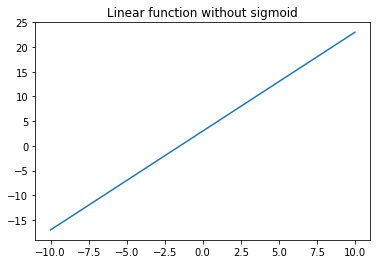

In [51]:
y = linear_func(x) #y는 음의 무한대부터 양의 무한대까지의 값들임. 
plt.plot(x, y)
plt.title("Linear function without sigmoid")


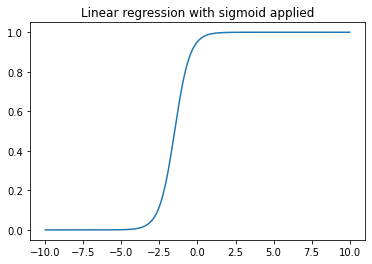

In [52]:
#y값에 sigmoid함수를 적용해 보자.
sig = sigmoid(y) 
plt.plot(x, sig)
plt.title("Linear regression with sigmoid applied") #S(sigma)처럼 생겨서 Sigmoid 함수.
plt.show() 
#0부터 1까지의 값으로 부드럽게 맵핑되는 것을 확인할 수 있음.

이제 Sigmoid를 선형회귀에 적용해 보자. 

$$ 0< p= \frac{1}{1+e^{-(\sum{b_{n}x_{n}}+b_{0})}} < 1$$

위 식을 수정해 보자. 
$$ Odds \ ratio = \frac{p}{1-p} = e^{\sum{b_{n}x_{n}}+b_{0}}   $$

드디어 일반적인 선형회귀 식으로 다시 돌아올 수 있게 되었다. 
$$ Log \ Odds = logits = log\frac{p}{1-p} = {\sum{b_{n}x_{n}}+b_{0}}   $$

Logistic Regression의 손실 함수는 딥러닝에서 그 유명한 **Cross Entropy loss**이다. 다만 수식이 너무 많아 이 장에서는 굳이 구현하지 않는다. 

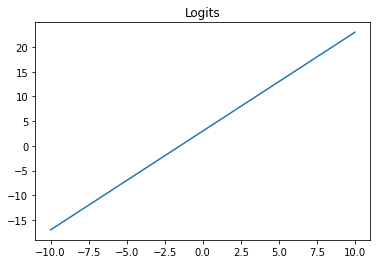

In [53]:
#코드로 이 과정을 구현해 보자.
p = sigmoid(y)  #y라고 하는 선형회귀 결과를 Sigmoid 함수에 넣은 값 p.
logits = np.log(p/(1-p)) #p를 바탕으로 Logits 계산
plt.plot(x, logits) 
plt.title("Logits")
plt.show()
#그림을 보면 Log odds의 그림은 다시 원래대로의 단순 선형회귀가 된 것을 볼 수 있다.

##분류 pt.4 (Support Vector Machine)

SVM(Support Vector Machine)이란 분류를 위한 기준을 결정하는 모델이다. 예를 들어 사과의 반점의 개수와 붉은 정도를 바탕으로 사과가 불량인지 정상인지 판별하려고 하는 일을 생각해보자. 불량 여부를 판단하기 위해 기준이 되는 반점의 개수와 붉은 정도를 결정하는 것이 SVM이다. 

In [54]:
#그림을 보고 이해해 보자.
#학습데이터 내에 1그룹, 2그룹을 설정해 보자.
x_1 = np.array([np.random.normal(2, 1.5) for i in range(1000)]) #1그룹의 x값.
y_1 = np.array([np.random.normal(4, 1.5) for i in range(1000)]) #1그룹의 y값.
x_2 = np.array([np.random.normal(10, 1.5) for i in range(1000)]) #2그룹의 x값.
y_2 = np.array([np.random.normal(15, 1.5) for i in range(1000)]) #2그룹의 y값.
#(x_1, y_1)과 (x_2, y_2)는 1000개의 값으로 이루어진 순서쌍(tuple)이다. 

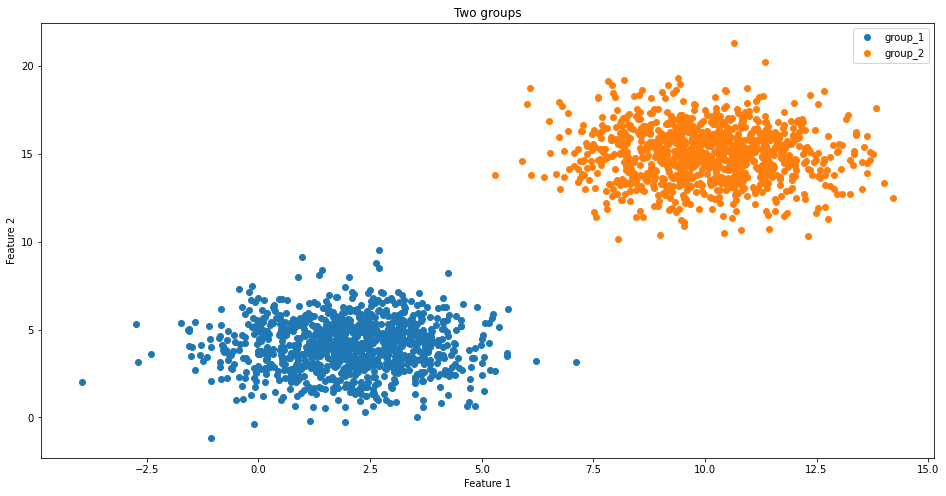

In [55]:
#시각화 해보자. 파란색이 1그룹, 주황색이 2그룹이라고 해 보자. 
ax = plt.figure(figsize = (16, 8))
plt.scatter(x = x_1, y = y_1, label = "group_1") 
plt.scatter(x = x_2, y = y_2, label = "group_2")
plt.legend(loc = "best")

plt.title("Two groups")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

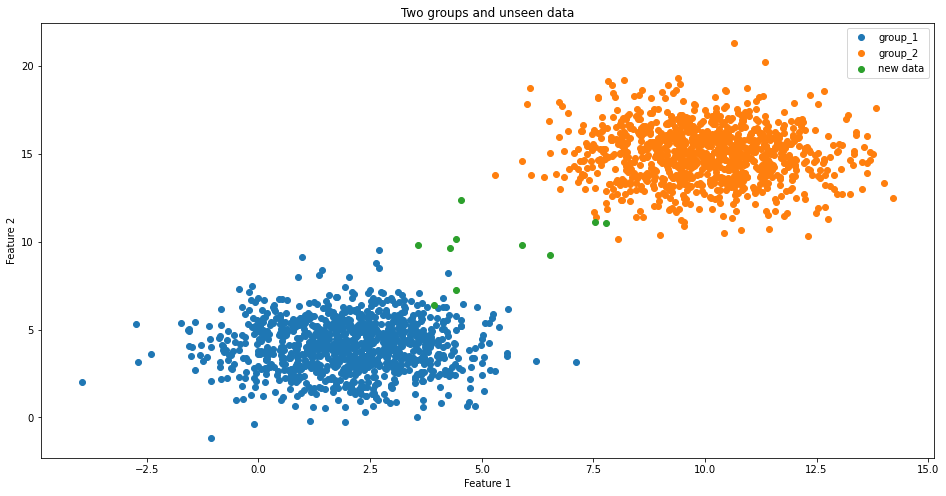

In [56]:
#학습 과정에서 보지 못했던 처음 본 x, y의 순서쌍(x_new, y_new)이 있다고 해 보자. 이들은 어떻게 분류할 것인가? 이 셀은 코드 열심히 볼 필요 없음.
x_new = np.array([np.random.normal(5, 2) for i in range(10)]) 
y_new = np.array([np.random.normal(10, 2) for i in range(10)])

ax = plt.figure(figsize = (16, 8))
plt.scatter(x = x_1, y = y_1, label = "group_1") 
plt.scatter(x = x_2, y = y_2, label = "group_2")
plt.scatter(x = x_new, y = y_new, label = "new data")
plt.legend(loc = "best")

plt.title("Two groups and unseen data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

위 그림에서 초록색 점들(테스트 데이터)들을 잘 분류하기 위해서 SVM 알고리즘은 선을 긋고자 한다.

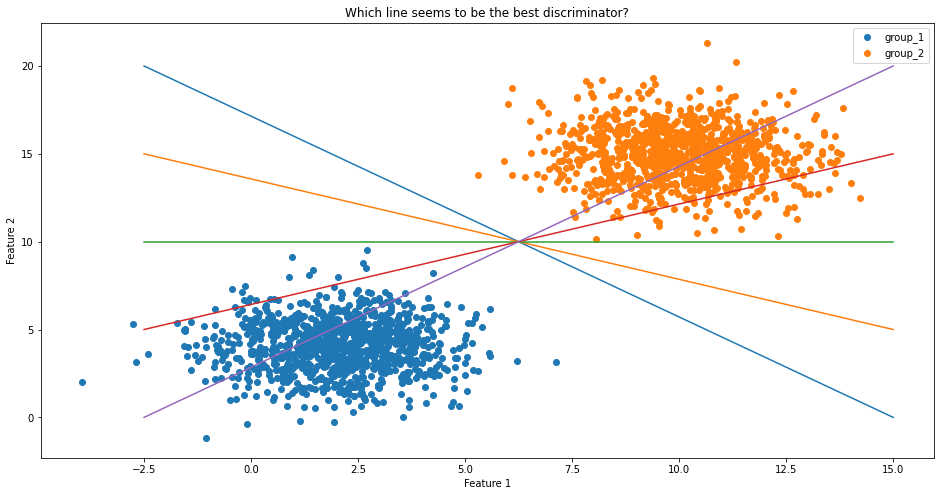

In [57]:
#선을 5개 긋고자 한다. 이 셀은 코드 열심히 볼 필요 없음.
x_start = np.array([-2.5 for i in range(5)]) 
y_start = np.linspace(0, 20, 5) 
x_end = np.array([15 for i in range(5)])
y_end =np.linspace(0, 20, 5)

ax = plt.figure(figsize = (16, 8))
plt.scatter(x = x_1, y = y_1, label = "group_1") 
plt.scatter(x = x_2, y = y_2, label = "group_2")
plt.legend(loc = "best")
#sns.scatterplot(x = x_new, y = y_new)
plt.plot([x_start[0], x_end[0]], [y_start[4], y_end[0]])
plt.plot([x_start[1], x_end[1]], [y_start[3], y_end[1]])
plt.plot([x_start[2], x_end[2]], [y_start[2], y_end[2]])
plt.plot([x_start[3], x_end[3]], [y_start[1], y_end[3]])
plt.plot([x_start[4], x_end[4]], [y_start[0], y_end[4]])
plt.title("Which line seems to be the best discriminator?")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


SVM은 아래와 같이 Support vector가 될 벡터를 설정하고 그 Support Vector와 직선간의 거리가 가장 멀어지는 선을 기준선으로 삼는다.

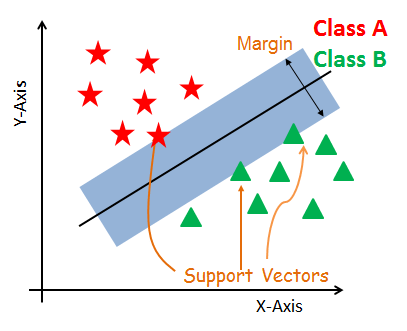

구체적인 과정은 다음과 같다.

(1) 데이터 포인트를 바탕으로 랜덤한 직선을 설정한다

(2) 그 직선으로부터 거리가 가장 먼 데이터 포인트를 각 그룹별로 Support vector로 설정한 뒤 거리를 잰다.

(3) 거리가 최소가 되는 직선과 support vector를 결정하고 이를 바탕으로 데이터를 분류한다.

In [58]:
#SVM 수행하기 위해 데이터프레임 만들기. 
group_1_df = pd.DataFrame([x_1, y_1]).T #T는 transpose의 약자로 행과 열을 교체한 것임. 
group_1_df["group"] = 1
group_2_df = pd.DataFrame([x_2, y_2]).T
group_2_df["group"] = 2
group_df = pd.concat([group_1_df, group_2_df], axis = 0)
group_df.columns = ["x", "y", "group"]
group_df #1000개가 group 1, 1000개가 group 2인 데이터프레임 제작.

,x,y,group
0,4.012701,4.303933,1
1,1.309144,6.437713,1
2,0.683303,4.139113,1
3,2.638561,5.048513,1
4,2.894584,5.024063,1
...,...,...,...
995,11.904368,14.784266,2
996,9.097283,12.644216,2
997,13.343676,14.997319,2
998,10.211154,15.835710,2


In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(group_df[["x", "y"]], group_df["group"]) #학습. 
print("support vector : ", classifier.support_vectors_, "\n") 
#학습을 통해 설정된 최적의 직선과 가장 거리가 먼 support vectors. 당연히 그룹별로 한 개니까 두개의 지점.


support vector :  [[ 4.2398362   8.24519033]
 [ 5.29821353 13.79198614]
 [ 8.05811837 10.16057524]] 



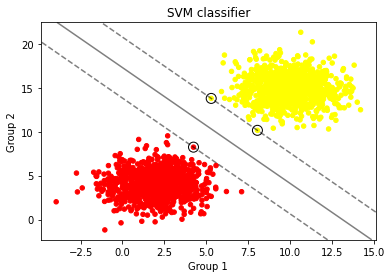

In [60]:
#시각화. 이 셀은 코드 열심히 볼 필요 없음.
ax = plt.gca()
plt.scatter(group_df["x"], group_df["y"], c = group_df["group"], s = 20, cmap = 'autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title("SVM classifier")
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Group 1")
plt.ylabel("Group 2")
plt.show()

#Ensemble

## Ensemble pt.1 (Overview)

###*똑똑한 한 명보단 바보 여러 명이 낫다*

앙상블(Ensemble)은 여러 개의 약한 모델(Weak learners)을 생성하고 그 모델들의 결론을 종합해서 보다 정확하게 예측하는 머신러닝 학습 기법이다. 주로 분류의 영역에서 쓰인다.

LightGBM, XGBoost 등 대회에서 고성능을 내는 머신러닝 모델들은 대부분 Ensemble 기법을 통해 생성된다.  

앙상블 학습의 유형은 크게 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나뉜다.

### **보팅** 

보팅: 서로 다른 여러 개의 알고리즘들이 투표를 통해 최종 모델을 선정하는 앙상블 알고리즘

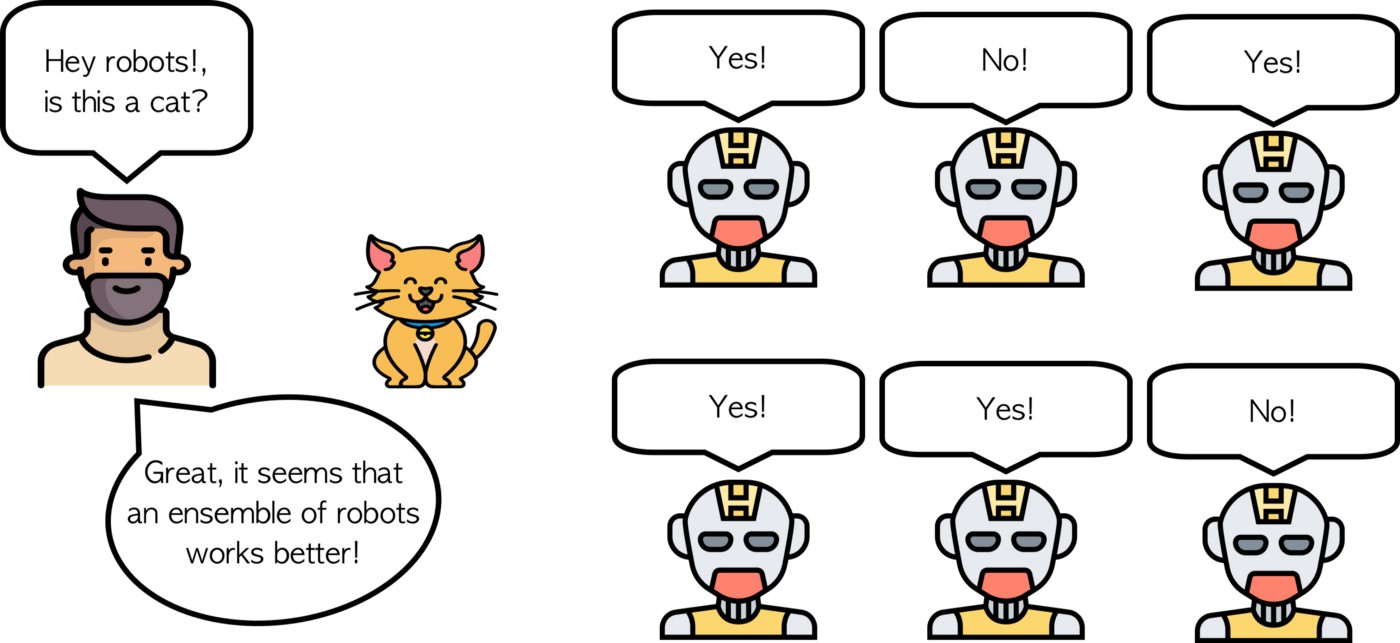

보팅의 종류에는 하드 보팅(Hard Voting), 소프트 보팅(Soft Voting)이 있다.

> 하드 보팅(Hard Voting)

여러 종류의 Classifier들이 '딱딱하게' 예측한 값들에서 다수결.

> 들여쓴 블록

여러 종류의 Classifier들이 확률을 예측하고 이 확률을 평균내서 결론냄.



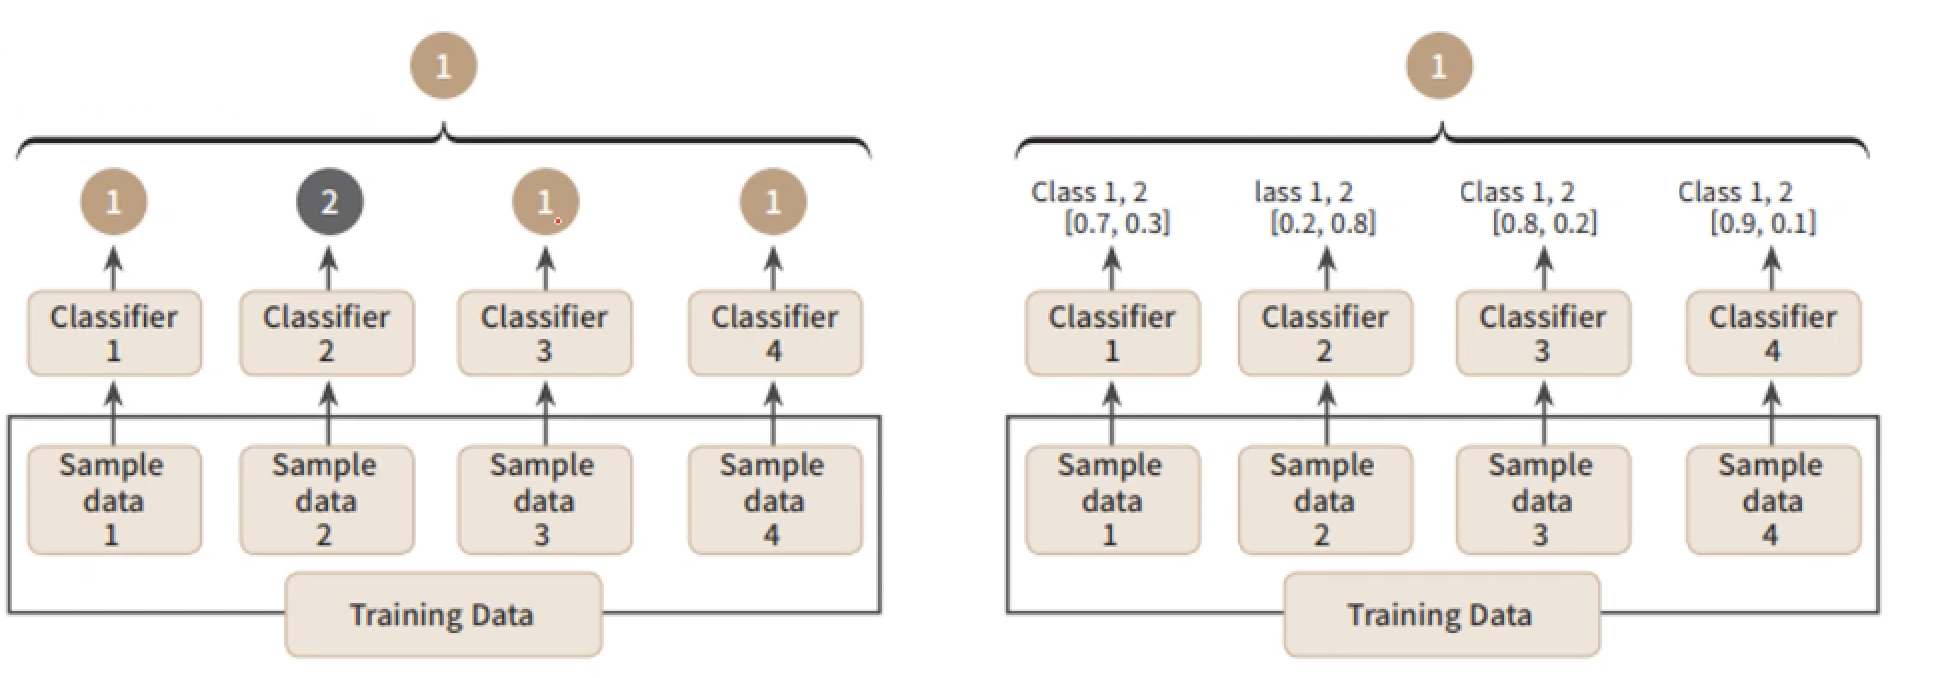

###**배깅**

배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

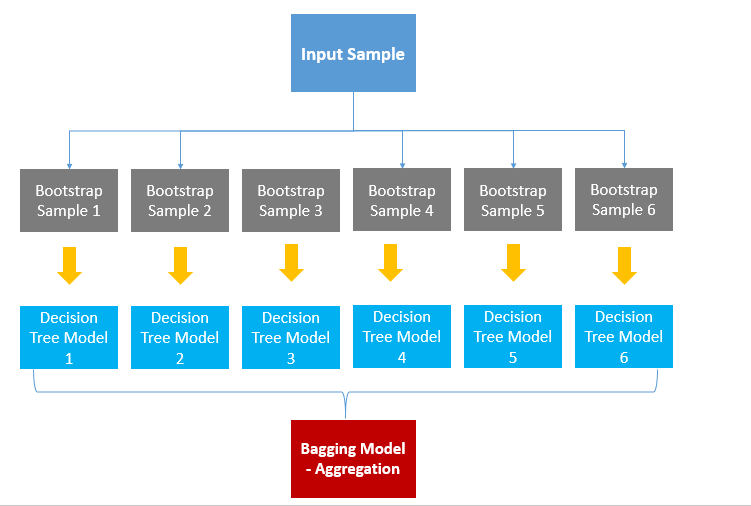

Bootstrap은 데이터를 샘플링하는 하나의 방식인데 아래의 사진처럼 한정된 데이터셋에서 여러 방향으로 랜덤 샘플링을 거쳐 다양한 데이터셋을 만드는 방식이다. 이를 배깅에 활용하면 자칫 단조로워 보일 수 있는 동일 모델들이 서로 다른 데이터를 학습하게 되고 모델별로 가지고 있는 아이디어가 다르게 될 것이다.

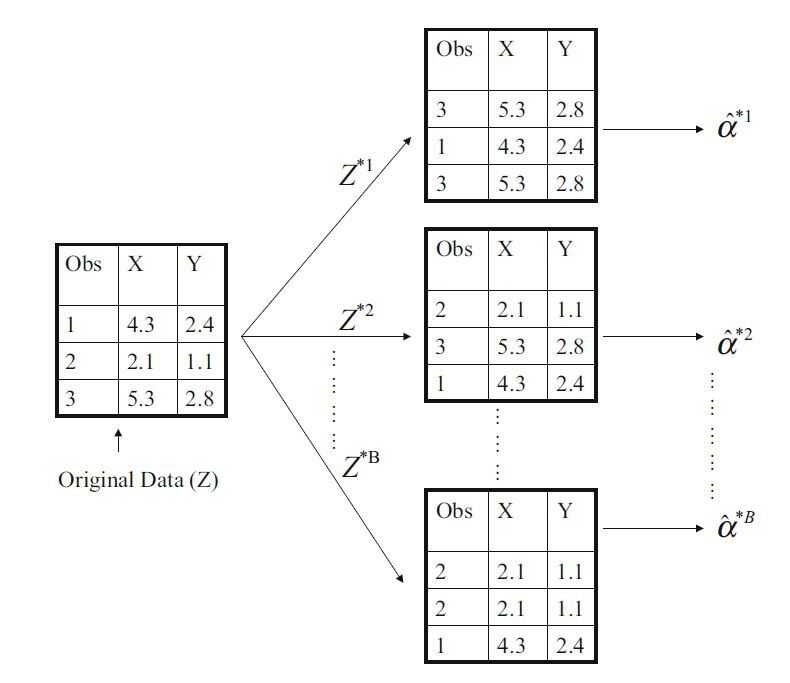

###부스팅

**부스팅**: 부스팅은 배깅과 비슷하게 여러 개의 모델들이 순차적으로 학습하면서 이전 모델의 실수에 가중치를 부여하여 이후 모델이 학습하는 과정을 반복해 오류를 계속해서 개선해 나가는 알고리즘. 

아래 사진처럼 배깅과 부스팅은 학습의 방식이 병렬적인지 직렬적인지 따라 구분된다.

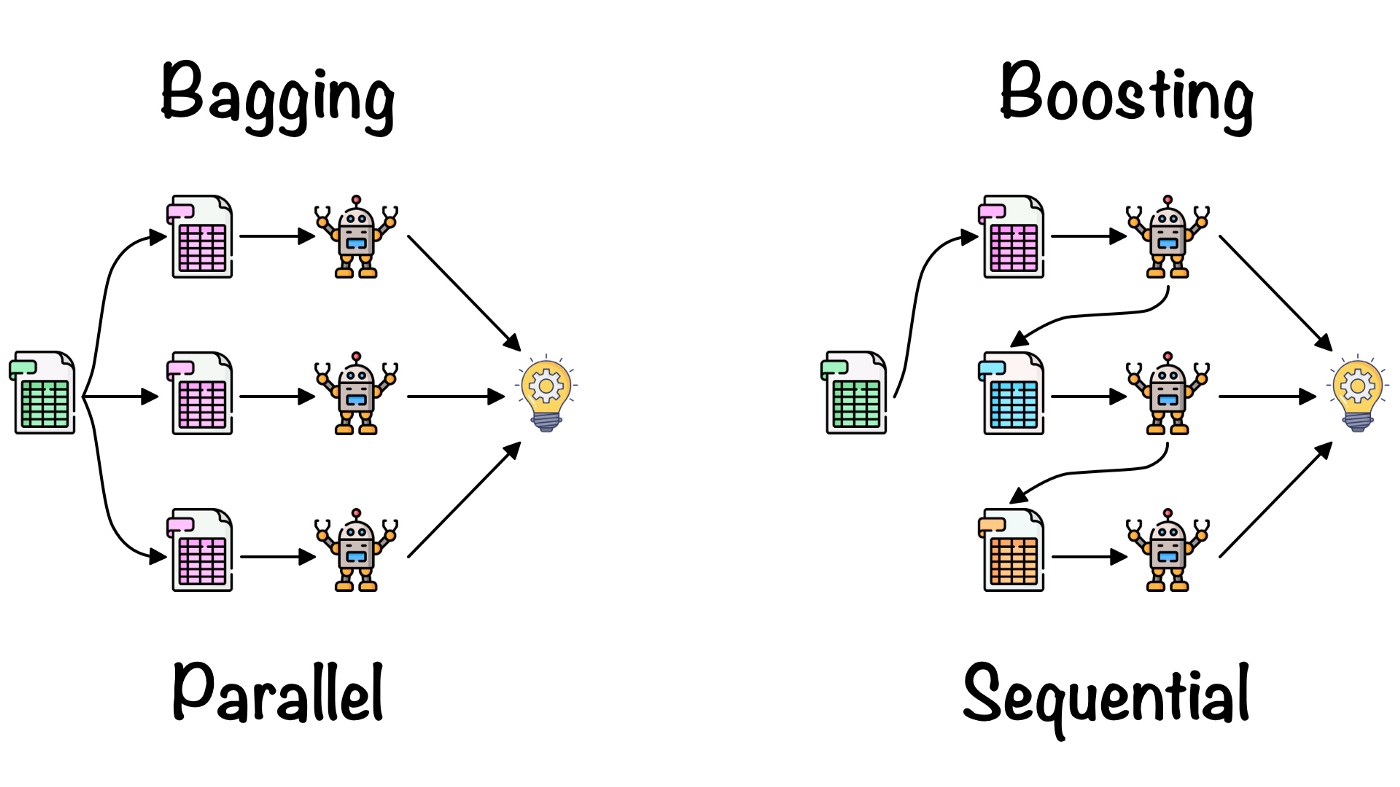

##Ensemble pt.2 (Application)

###RandomForest

RandomForest는 여러 개의 DecisionTree Classifier가 분류해 놓은 결과들을 바탕으로 한 soft voting을 통해 종합적인 결론을 내 놓는 알고리즘이다. 다양한 영역에서 높은 예측 성능을 보이고 있다.

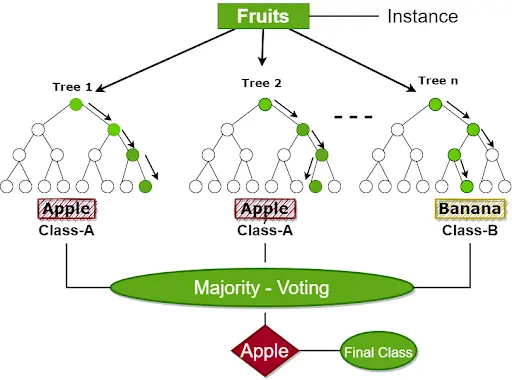

RandomForest 학습 순서는 다음과 같다.



> 학습 데이터셋을 Bootstraping을 통해 여러 개의 subset으로 분할한다

> 여러 개의 개별 Decision Tree들이 각기 다른 subset의 데이터로 학습을 한 뒤 soft voting을 통해 최종 결론을 낸다.





###XGBoost

Gradient Boosting 은 Random Forest와 같이 트리 기반의 Boosting 기법이다. 진행 과정에서 이전 모델의 오류를 학습하고 조정할 때 Gradient Descent 방식을 사용한다는 점이 특징적이다. 모델의 오류를 학습하는 과정이 직렬적으로 이루어지기 때문에 연산 속도가 매우 느리다. 

이렇게 느린 연산 속도 문제를 해결하기 위해 여러 방식이 고안되었는데, 그 중 대표적인 것이 XGBoost(eXtra Gradient Boosting)이다. 과적합 규제 기능과 Tree pruning(가지치기), 병렬 연산 등을 통해서 기존 GB(Gradient Boosting)의 느린 속도를 개선했다.

사실 XGBoost가 각광받았던 것은 그 속도 때문이 아니라 뛰어난 성능 때문이었다. 캐글에서 상위권 데이터 과학자들이 XGBoost로 분류 문제를 잘 해결해서 유명해졌다.

###LightGBM

LightGBM은 XGBoost의 "여전히" 느린 속도를 해결하고자 XGBoost가 제작된 후 2년 후 고안되었다. 그 성능의 차원에서 XGBoost와 견주어도 큰 손색이 없다. 

아래 그림은 XGBoost와 LightGBM을 비교한 표인데, XGBoost는 leaf node를 균형 있게 늘려 나가는 방식을 채택하지만 LightGBM은 가지들을 중심 트리 분할로 때로는 비대칭적으로 늘려나간다. 쓸모없는 가지들은 잘리고(Pruning) 필요한 가지들만 불균형적으로 늘려나가도 학습 성능의 차원에서 큰 저하가 없다는 것을 증명했다. 

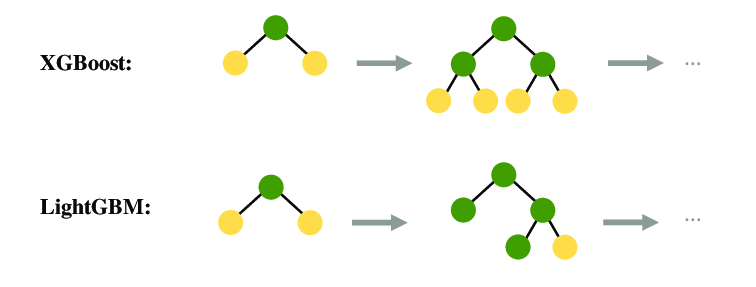

# 여러 분류기 Recap 및 비교

*   Logistic Regression


1.   결과를 직관적으로 이해할 수 있음
2.   기형적인 데이터셋에 적응하기 힘듬



---


*   Support Vector Machine


1.   비선형적인 데이터셋에도 적응할 수 있음.
2.   Overfitting에 강함(Robust)
3.   큰 데이터셋에 대해 연산 속도가 느림.


---


*   Random Forest

1. Overfitting에 강함(여러 모델을 평균하기에 한 모델이 두드러진 의견을 내도 묵살)
2. Ensemble 모델들 중에서 연산 속도가 느리고 복잡함

---


*   XGBoost

1. 이해하기 쉬움(학습 단계상 최종 단계 트리를 단일 차원에서 확인할 수 있으므로)
2. 불안정함(여러 모델이 직렬적으로 연결되어 있기 때문)

---


*   LightGBM

1. 연산 속도가 매우 빠름
2. Overfitting 가능성(트리 모델이 중심 트리 분할하기에 계속 깊어지기 때문)
3. Large Dataset에 적합(보통 10,000개 이상)
---




# Titanic Data EDA

기초 분석

In [61]:
titanic = pd.read_csv("/content/gdrive/MyDrive/23w MLWIKI/titanic.csv") 
#타이타닉에 탔던 사람들의 신원 정보 데이터셋이다. Survived; 즉 다른 features를 보고 생존했는지 여부를 알아맞히는 문제이다. 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
"""
survival:	Survival [0 = No, 1 = Yes]
pclass:	Ticket class	[1 = 1st, 2 = 2nd, 3 = 3rd]
sex:	Sex	
Age:	Age [in years]	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	[C = Cherbourg, Q = Queenstown, S = Southampton]

"""

'\nsurvival:\tSurvival [0 = No, 1 = Yes]\npclass:\tTicket class\t[1 = 1st, 2 = 2nd, 3 = 3rd]\nsex:\tSex\t\nAge:\tAge [in years]\t\nsibsp:\t# of siblings / spouses aboard the Titanic\t\nparch:\t# of parents / children aboard the Titanic\t\nticket:\tTicket number\t\nfare:\tPassenger fare\t\ncabin:\tCabin number\t\nembarked:\tPort of Embarkation\t[C = Cherbourg, Q = Queenstown, S = Southampton]\n\n'

In [63]:
titanic.shape #데이터는 891개. 컬럼의 수는 12개

(891, 12)

In [64]:
titanic.info() #Name, Sex, Ticket, Cabin, Embarked는 문자형으로 되어 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


결측치 처리

In [66]:
#결측치 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
#Age, Cabin, Embarked에서 결측치가 발견되었는데 어떻게 처리할까?

In [68]:
#Age는 평균으로 처리해 주자
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [69]:
#Cabin은 결측치가 거의 대부분인데 필요가 있을까? 이 피처는 쓰지 않는 것이 좋을 듯.
titanic = titanic.drop(["Cabin"], axis = 1 )
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
#Embarked는 어디서 승선했는지의 여부인데 categorical variables이기에 최빈값으로 대체하도록 하겠다. 
#사실 결측치가 두 개밖에 안 되어서 처리 방식은 그다지 중요하지 않을듯.
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts().index[0]) #최빈값으로 fillna를 해 줌.


In [72]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

target 접근: 얼마나 많은 사람이 살아남았는가?

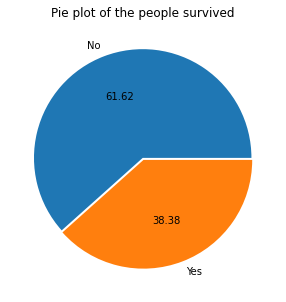

In [73]:
ax = plt.figure(figsize = (16, 5)) #빈 캔버스 생성
plt.pie(titanic["Survived"].value_counts(), explode = [0.01, 0.01], labels = ["No", "Yes"], autopct = "%.2f") 
#생존자의 수를 바탕으로 파이플롯 작성. explode는 각 파이들이 얼마나 중점으로부터 떨어질지를 결정. labels는 각 파이의 이름을 의미. autopct는 자동으로 퍼센트를 표기하겠다는 의미.
plt.title("Pie plot of the people survived")
plt.show()

성별과 생존의 상관관계 분석

In [74]:
titanic.groupby(by = ["Sex", "Survived"])["Survived"].count()
#남성이 여성보다 많이 죽은 것을 확인할 수 있음.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

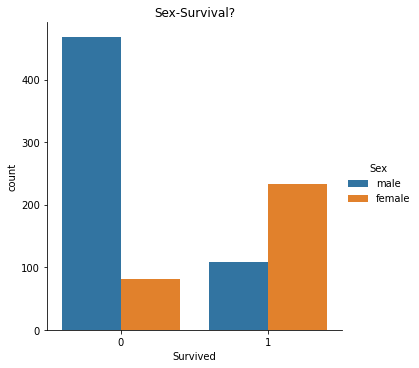

In [75]:
#Sex, Survived 모두 categorical variables 이기 때문에 catplot이 적절함.
sns.catplot(x = "Survived", kind = "count", hue = "Sex", data = titanic)
plt.title("Sex-Survival?")
plt.show()

티켓 클래스와 생존간의 상관관계분석

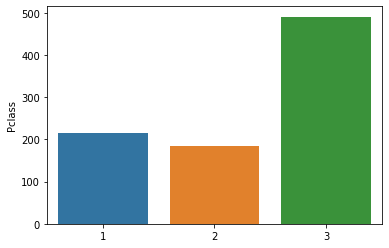

In [76]:
#티켓 클래스는 categorical 변수 중에서도 순서형 변수(ordinal variables)이다. 즉 그 숫자의 순위가 의미를 갖고 있음. 1은 최우등석, 2는 우등석, 3는 일반석이기 때문.
sns.barplot(x = titanic["Pclass"].value_counts().index, y = titanic["Pclass"].value_counts())


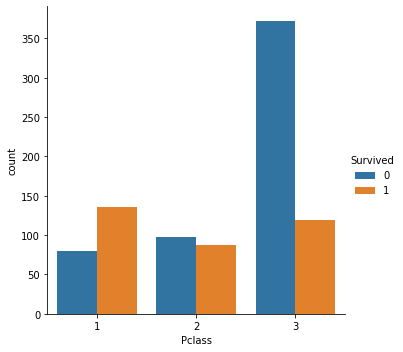

In [77]:
sns.catplot(x = "Pclass", kind = "count", hue = "Survived", data = titanic)
#아무래도 1등석에 탄 사람들이 생존확률이 높았음. 구조 확률이 더 높았을 것이라고 생각할 수 있음.

Feature Engineering

In [78]:
#sibsp, parch 는 각각 친척/배우자의 수 와 부모님의 수를 의미함. 이를 합쳐서 family_size라는 변수로 만들어보자.
#이와 동시에 sibsp+parch인 총 동승 가족의 수가 0명인 사람에 대해 alone이라는 변수명을 부여해주자.

In [79]:
titanic['Family_Size'] = 0 #Family_size라는 열 생성 및 0으로 초기화.
titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp'] #가족 수를 계산해주기.
titanic['Alone'] = 0 #Alone이라는 이진분류용 열 생성 및 0으로 초기화.
titanic.loc[titanic["Family_Size"] == 0,"Alone"] = 1 #Family_size 가 0인사람은 1로 라벨링. 나머지는 여전히 0

In [80]:
#Name, PassengerID, Ticket는 중요하지 않은 변수임. 생존분석에 어떠한 도움도 주지 않는다는 것을 직관적으로 이해할 수 있음.
titanic = titanic.drop(["Name", "PassengerId", "Ticket"], axis =1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [81]:
#Sex, Embarked 변수는 아직 categorical varable의 상태이므로 인코딩해주자. Label Encoding 활용하기.
from sklearn.preprocessing import LabelEncoder 

le_sex = LabelEncoder()
le_sex.fit(titanic["Sex"])
titanic["Sex"] = le_sex.transform(titanic["Sex"])
titanic.head() 
#Male은 1, Female은 0으로 인코딩됨.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
0,0,3,1,22.0,1,0,7.2500,S,1,0
1,1,1,0,38.0,1,0,71.2833,C,1,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,1,0
4,0,3,1,35.0,0,0,8.0500,S,0,1


In [82]:
le_embarked = LabelEncoder()
le_embarked.fit(titanic["Embarked"])
titanic["Embarked"] = le_embarked.transform(titanic["Embarked"])
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1


#Titanic Survival Modeling

위에서 EDA를 했으니 이제 직접 분류 모델링을 해 보자.

In [83]:
#필요 라이브러리 임포트
#모델
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier #XGBoost
import lightgbm as lgb #LightGBM
from sklearn import tree


#기타
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [84]:
X = titanic.drop(["Survived"], axis = 1)
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#712개의 데이터가 training에서 쓰이고 179개의 데이터가 test 과정에서 쓰임.

(712, 9) (179, 9) (712,) (179,)


In [85]:
#어떤 모델이든 그 성능을 여러 지표로 평가해 보여주는 함수를 제작하자
def evaluate_metrics(model, X_test, y_test):
  y_hat = model.predict(X_test)
  print("Confusion matrix: ", confusion_matrix(y_test, y_hat), "\n")
  print("Accuracy: ", accuracy_score(y_test, y_hat), "\n")
  print("Precision: ", precision_score(y_test, y_hat), "Recall: ", recall_score(y_test, y_hat), "\n")
  print("F1 score: ", f1_score(y_test, y_hat), "\n")

In [86]:
#Logistic Regression
Log_R = LogisticRegression()
Log_R.fit(X_train, y_train)
evaluate_metrics(Log_R, X_test, y_test)

Confusion matrix:  [[91 16]
 [20 52]] 

Accuracy:  0.7988826815642458 

Precision:  0.7647058823529411 Recall:  0.7222222222222222 

F1 score:  0.7428571428571428 



In [87]:
#Support Vector Machine 학습
svc = svm.SVC(kernel = "linear", C = 0.1, gamma = 0.1) 
svc.fit(X_train, y_train) 
evaluate_metrics(svc, X_test, y_test)

Confusion matrix:  [[94 13]
 [23 49]] 

Accuracy:  0.7988826815642458 

Precision:  0.7903225806451613 Recall:  0.6805555555555556 

F1 score:  0.7313432835820894 



In [88]:
#Decision Tree 학습
DTclf = DecisionTreeClassifier(max_depth = 4)
DTclf.fit(X_train, y_train)
evaluate_metrics(DTclf, X_test, y_test)

Confusion matrix:  [[96 11]
 [25 47]] 

Accuracy:  0.7988826815642458 

Precision:  0.8103448275862069 Recall:  0.6527777777777778 

F1 score:  0.7230769230769231 



In [89]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
0,3,1,22.0,1,0,7.2500,2,1,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,2,0,1
3,1,0,35.0,1,0,53.1000,2,1,0
4,3,1,35.0,0,0,8.0500,2,0,1


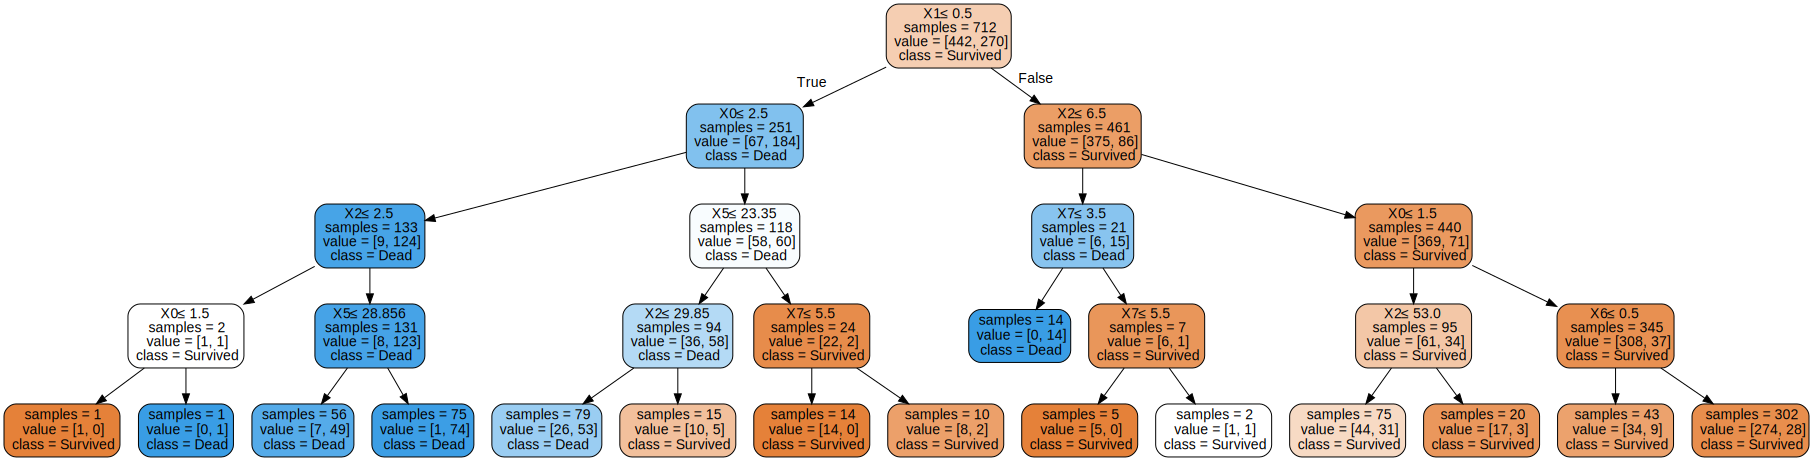

In [90]:
#Decision Tree는 다른 방식으로도 시각화해보자.
dot_data4 = tree.export_graphviz(DTclf, out_file=None,  
                                filled=True, rounded=True,  
                                special_characters=True, impurity = False, class_names = ["Survived", "Dead"]) #Decision Tree 시각화
graph4 = graphviz.Source(dot_data4) 
graph4


In [91]:
#RandomForest 학습
RfClf = RandomForestClassifier(n_estimators=100, max_depth = 4) #n_estimators라는 것은 숲 속 나무의 개수. 즉 각기 다른 tree 모델들의 개수이다.
RfClf.fit(X_train, y_train)
evaluate_metrics(RfClf, X_test, y_test) #확실히 성능이 좋은 것을 볼 수 있음. 위에서 만들었던 Decision Tree가 100개나 있는 숲이니까.

Confusion matrix:  [[99  8]
 [21 51]] 

Accuracy:  0.8379888268156425 

Precision:  0.864406779661017 Recall:  0.7083333333333334 

F1 score:  0.7786259541984732 



In [92]:
#XGBoost 학습
xgbClf = XGBClassifier(n_estimators = 100)
xgbClf.fit(X_train, y_train) 
evaluate_metrics(xgbClf, X_test, y_test)

Confusion matrix:  [[99  8]
 [25 47]] 

Accuracy:  0.8156424581005587 

Precision:  0.8545454545454545 Recall:  0.6527777777777778 

F1 score:  0.7401574803149606 



In [93]:
#LightGBM 학습
lgbClf = lgb.LGBMClassifier(num_leaves = 20) #num_leaves
lgbClf.fit(X_train, y_train)
evaluate_metrics(lgbClf, X_test, y_test)

Confusion matrix:  [[96 11]
 [20 52]] 

Accuracy:  0.8268156424581006 

Precision:  0.8253968253968254 Recall:  0.7222222222222222 

F1 score:  0.7703703703703704 



#Cross Validation

위와 같은 학습을 하게 되면 어떠한 문제가 발생할까? 비록 train_test_split을 통해 학습, 검증 데이터를 잘 나누어 놓았지만 결국 나뉜 순간부터 학습 데이터와 검증 데이터는 그대로이다. 

모델링 과정 중에서 계속 같은 test data에 대해서만 검증하기 때문에 **test data에 과적합될 수 있다.** 기존의 과적합이 train data에 대한 것이었다면 이제는 test data에 과적합되어 실무(새로 본 데이터)에 적용하기 어려워질 수 있다는 점이다. 





Cross Validation(교차 검증)이라는 방식으로 이 문제를 해결할 수 있다. Cross Validation은 train_test_split의 메소드와 유사하지만 모델이 학습할 때 train data와 test data를 매 차례 달리하며 학습하는 과정이다. 

**K-fold Cross Validation(K폴드 교차검증)**: Cross validation의 주요 방법 중 하나로 데이터를 비슷한 크기의 부분집합(fold)으로 나눈 뒤 각 fold를 한번씩 test data로 활용해서 모델링하는 방식이다.

In [100]:
from sklearn.model_selection import KFold
X = np.array(titanic.drop(["Survived"], axis = 1)) #array로 설정해 주는 것은 컴파일 에러를 막기 위함.
y = titanic["Survived"]

# n_splits 는 몇 개의 부분집합으로 분할할 것인지를 나타냄. 5개로 나누었으니 당연히 학습은 다섯 차례 진행 될 것임.
kf = KFold(n_splits = 5, shuffle = True, random_state = 50)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in kf.split(X):
  print("검증 데이터 인덱스:", test_index)


"""
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
"""

검증 데이터 인덱스: [  2   5   7   9  10  16  19  25  29  32  37  38  43  46  48  66  76  82
  86  90  98 104 116 118 124 127 144 146 158 166 183 188 191 194 202 203
 210 220 222 225 234 243 248 252 260 263 264 265 267 279 286 297 314 315
 319 321 323 328 333 337 344 345 356 366 368 370 386 389 394 396 399 401
 413 417 421 424 443 444 454 459 469 470 471 473 474 478 479 483 484 485
 493 494 500 503 510 513 520 525 529 532 535 536 538 543 547 549 550 554
 558 565 570 585 586 589 593 599 600 608 610 612 615 629 631 646 647 656
 658 663 670 671 673 678 679 684 685 686 687 697 700 703 709 710 715 725
 728 734 747 750 751 756 761 763 764 776 780 781 786 788 789 798 806 807
 808 812 816 818 821 846 850 852 859 864 867 874 875 876 882 884 889]
검증 데이터 인덱스: [  8  11  18  23  24  31  34  35  42  52  54  65  77  81  85  87 100 108
 110 111 112 114 115 120 137 143 145 149 151 157 159 160 162 168 172 175
 179 180 192 195 201 206 212 213 216 227 232 237 244 246 249 253 255 259
 270 273 274 282 284 287 293 2

'\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n'

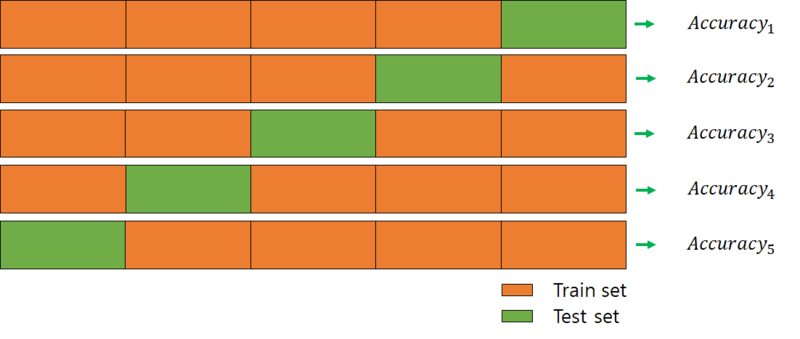

In [105]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 50)

accuracy_history = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfClf = RandomForestClassifier(n_estimators=5, random_state=0) #예시로 RandomForest모델 활용.
    rfClf.fit(X_train, y_train)
    y_hat = rfClf.predict(X_test)
    accuracy_history.append(accuracy_score(y_hat, y_test))

print("평균 점수: " , np.mean(accuracy_history)) 
#결과로 나온 평균 점수가 bias가 없는 진짜 점수인 것. 처음 보는 데이터셋에 대한 적응력이 더 높을 것. 

평균 점수:  0.7688092398468395


In [106]:
#위의 과정을 조금 더 단순하게 할 수 있는 코드가 있음. 윗 셀보다 이 코드에 더 집중하자.
from sklearn.model_selection import cross_val_score #라이브러리 임포트
kf = KFold(n_splits = 5, shuffle = True, random_state = 50) #KFold객체 생성


rfClf = RandomForestClassifier(n_estimators=5, random_state=0) #예시로 RandomForest모델 활용.

cv_result = cross_val_score(rfClf,X,y, cv = kf,scoring = "accuracy")
print(cv_result.mean())

0.7688092398468395


#3주차 과제

0. 목차 기준 Titanic Data EDA, Titanic Survival Modeling, Cross Validation 코드를 전부 필사하라.

1. https://www.notion.so/deepdaiv/4efbe5caadfc44758b978a594fcdf486?pvs=4#1725b9fb23fa4f9a9df23a1d56600189 위 링크의 노션 프로젝트 페이지에서 bank.csv 를 다운로드 받고 info, describe등을 활용해 데이터의 개요를 파악하라.

2. 데이터에 대해 각기 다른 방식으로 총 3가지 시각화를 수행하라.

3. 컬럼 간 연산을 통해 분석에 필요할 것이라고 생각하는 컬럼을 추가하고 근거를 제시하라.

4. 라벨인코딩을 통해 모든 범주형 변수를 인코딩하라.

5. 쓸모없는 컬럼이 있다면 제거하고 그 근거를 제시하라.  

6. train_test_split 메소드를 활용해 데이터를 학습 데이터와 검증 데이터로 나누어라. 

7. 3가지 다른 모델로 데이터를 학습한 뒤 accuracy와 F1 score 차원에서 성능을 비교하라.

8. 7번에서 가장 성능이 좋았던 모델을 Cross Validation해서 최종 accuracy와 F1 점수의 평균값을 제시하라.